In [1]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
cwd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
SCOPE = 100

In [2]:
test = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
test

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [3]:
#test.interpolate(method='linear', axis=0)
#df.interpolate(method='linear', limit_direction='forward', axis=0)
#test.interpolate(method='polynomial', order=2)

In [4]:
PATH = '/home/bde'
download = f'{PATH}/Data/5Gdataset-master/5G-production-dataset/Download/Driving/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    print(file)
    df = pd.read_csv(file_dir+file)
    #print(df.head())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df['CellID'] = pd.to_numeric(df['CellID'])
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'])
    df['CQI'] = pd.to_numeric(df['CQI'])
    df['RSSI'] = pd.to_numeric(df['RSSI'])
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])
    df['NRxRSRP'] = pd.to_numeric(df['NRxRSRP'])
    df['NRxRSRQ'] = pd.to_numeric(df['NRxRSRQ'])

    df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    #df.fillna(method='ffill', inplace=True)
    #df.fillna(method='ffill', inplace=True, limit=5)
    #df.fillna(0, inplace=True)

    df.drop_duplicates(subset=['date'], inplace=True)
    df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)
    df_list.append(df)

B_2019.12.17_07.32.39.csv
<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 0 to 2574
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       2295 non-null   int64         
 1   CellID      2295 non-null   int64         
 2   RSRP        2295 non-null   int64         
 3   RSRQ        2295 non-null   int64         
 4   SNR         2295 non-null   float64       
 5   CQI         2295 non-null   int64         
 6   RSSI        2295 non-null   float64       
 7   DL_bitrate  2295 non-null   int64         
 8   UL_bitrate  2295 non-null   int64         
 9   NRxRSRP     2295 non-null   float64       
 10  NRxRSRQ     2295 non-null   float64       
 11  date        2295 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 233.1 KB
B_2020.01.16_09.56.56.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1536 entries, 0 to 1740
Data columns (total 12 columns):
 

In [5]:
df = pd.concat(df_list, axis=0)
df.sort_values('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 0 to 857
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24104 non-null  int64         
 1   CellID      24104 non-null  int64         
 2   RSRP        24104 non-null  int64         
 3   RSRQ        24104 non-null  float64       
 4   SNR         24104 non-null  float64       
 5   CQI         24104 non-null  float64       
 6   RSSI        24104 non-null  float64       
 7   DL_bitrate  24104 non-null  int64         
 8   UL_bitrate  24104 non-null  int64         
 9   NRxRSRP     24104 non-null  float64       
 10  NRxRSRQ     24104 non-null  float64       
 11  date        24104 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 2.4 MB


In [6]:
df.head()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,date
0,0,12,-99,-15.0,6.0,12.0,-90.0,7,1,-100.0,-15.0,2019-12-14 10:16:30
1,1,12,-99,-15.0,6.0,12.0,-90.0,7,1,-100.0,-15.0,2019-12-14 10:16:31
3,1,12,-102,-14.0,6.0,12.0,-90.0,0,0,-99.0,-15.0,2019-12-14 10:16:32
4,1,12,-102,-14.0,6.0,12.0,-90.0,9,12,-99.0,-15.0,2019-12-14 10:16:33
5,1,12,-102,-14.0,4.0,12.0,-90.0,0,0,-99.0,-14.0,2019-12-14 10:16:34


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24104 entries, 0 to 857
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24104 non-null  int64         
 1   CellID      24104 non-null  int64         
 2   RSRP        24104 non-null  int64         
 3   RSRQ        24104 non-null  float64       
 4   SNR         24104 non-null  float64       
 5   CQI         24104 non-null  float64       
 6   RSSI        24104 non-null  float64       
 7   DL_bitrate  24104 non-null  int64         
 8   UL_bitrate  24104 non-null  int64         
 9   NRxRSRP     24104 non-null  float64       
 10  NRxRSRQ     24104 non-null  float64       
 11  date        24104 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 2.4 MB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def multi_corr(feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

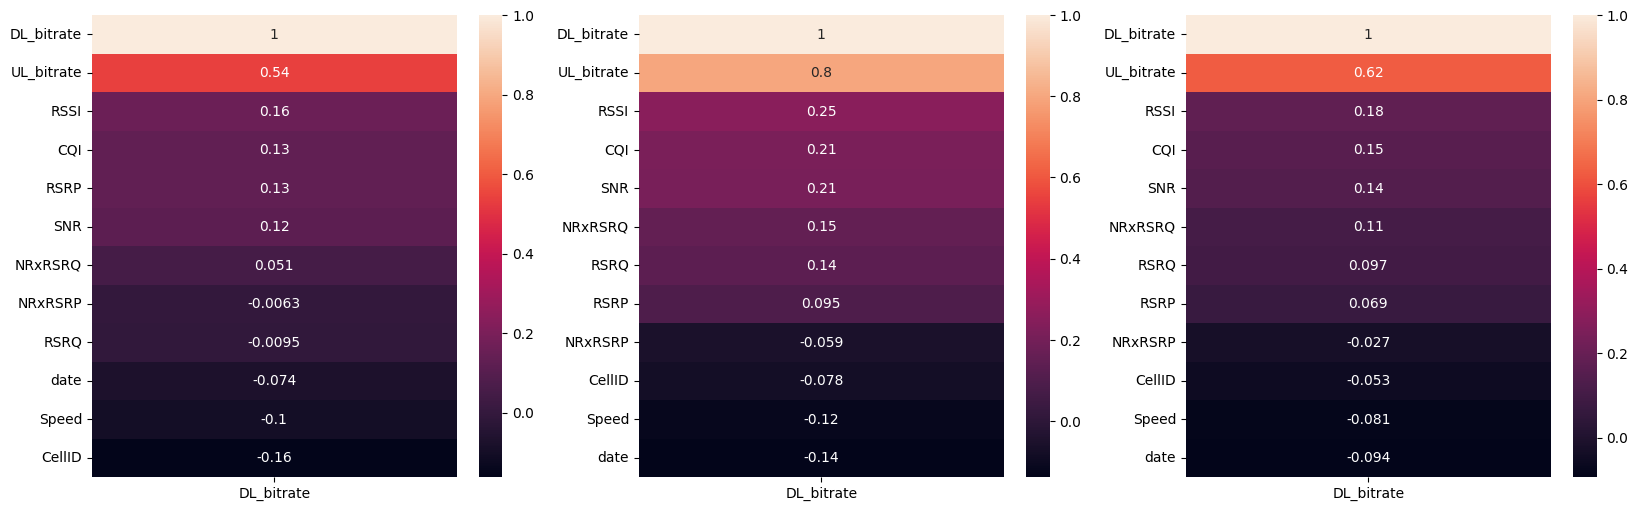

In [10]:
multi_corr('DL_bitrate')

In [11]:
df.to_csv('data/5Gdataset/download.csv', encoding='utf-8', index=False)

In [12]:
# number of changes in values
(df != df.shift(axis=0)).sum(axis=0)

Speed          1463
CellID          697
RSRP           9162
RSRQ           8031
SNR            9514
CQI            8014
RSSI           9233
DL_bitrate    22313
UL_bitrate    21951
NRxRSRP       10280
NRxRSRQ       10252
date          24104
dtype: int64